<a href="https://colab.research.google.com/github/RChandana/HLoc/blob/main/EuRoC_Mav_Demo_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone --quiet --recursive https://github.com/cvg/Hierarchical-Localization/
%cd Hierarchical-Localization

# !git clone --quiet --recursive https://github.com/RChandana/HLoc/
# %cd HLoc

!pip install --progress-bar off --quiet -e .
!pip install --progress-bar off --quiet --upgrade plotly

import tqdm, tqdm.notebook
tqdm.tqdm = tqdm.notebook.tqdm  # notebook-friendly progress bars
from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_exhaustive
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

/content/Hierarchical-Localization
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
images = Path('/content/Hierarchical-Localization/Dataset/EuRoC_Mav')

outputs = Path('outputs/demo/')
!rm -rf $outputs
sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'features.h5'
matches = outputs / 'matches.h5'

feature_conf = extract_features.confs['disk']
matcher_conf = match_features.confs['disk+lightglue']

In [ ]:
if not images.exists():
    # !wget https://github.com/RChandana/HLoc/blob/39f3db1203d5c4797f79d0a7bd624d86ebea5c7e/Dataset/KITTI_CAM_Images/KITTI_CAM_Images.zip -P Dataset/
    !unzip /content/EuRoC_Mav.zip -d Dataset/

Archive:  /content/EuRoC_Mav.zip
   creating: Dataset/EuRoC_Mav/
  inflating: Dataset/EuRoC_Mav/1404733450532800000.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733450532800000.png  
  inflating: Dataset/EuRoC_Mav/1404733405882800128.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733405882800128.png  
  inflating: Dataset/EuRoC_Mav/1404733416932800000.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733416932800000.png  
  inflating: Dataset/EuRoC_Mav/1404733433382799872.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733433382799872.png  
  inflating: Dataset/EuRoC_Mav/1404733412682800128.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733412682800128.png  
  inflating: Dataset/EuRoC_Mav/1404733451932800000.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733451932800000.png  
  inflating: Dataset/EuRoC_Mav/1404733423682800128.png  
  inflating: Dataset/__MACOSX/EuRoC_Mav/._1404733423682800128.png  
  inflating: Dataset/EuRoC_Mav/1404733433532800000.png  
  i

54 mapping images


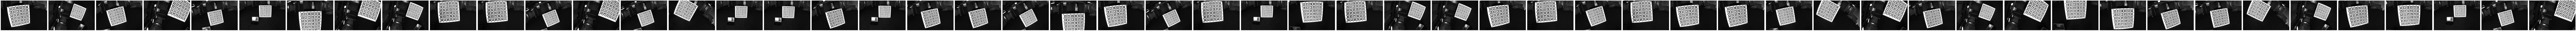

In [ ]:
references = [str(p.relative_to(images)) for p in (images).iterdir()]
print(len(references), "mapping images")
plot_images([read_image(images / r) for r in references], dpi=25)

In [ ]:
extract_features.main(feature_conf, images, image_list=references, feature_path=features)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches);

In [ ]:
model = reconstruction.main(sfm_dir, images, sfm_pairs, features, matches, image_list=references)

[2023/10/16 05:24:43 hloc INFO] Creating an empty database...
[2023/10/16 05:24:43 hloc INFO] Importing images into the database...
[2023/10/16 05:24:43 hloc INFO] Importing features into the database...


  0%|          | 0/54 [00:00<?, ?it/s]

[2023/10/16 05:24:43 hloc INFO] Importing matches into the database...


  0%|          | 0/1431 [00:00<?, ?it/s]

[2023/10/16 05:24:45 hloc INFO] Performing geometric verification of the matches...
[2023/10/16 05:24:58 hloc INFO] Running 3D reconstruction...
[2023/10/16 05:39:54 hloc INFO] Reconstructed 1 model(s).
[2023/10/16 05:39:54 hloc INFO] Largest model is #0 with 54 images.
[2023/10/16 05:39:54 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 54
	num_cameras = 54
	num_points3D = 4236
	num_observations = 99105
	mean_track_length = 23.3959
	mean_observations_per_image = 1835.28
	mean_reprojection_error = 1.19584
	num_input_images = 54


In [ ]:
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(255,0,0,0.5)', name="mapping", points_rgb=True)
fig.show()

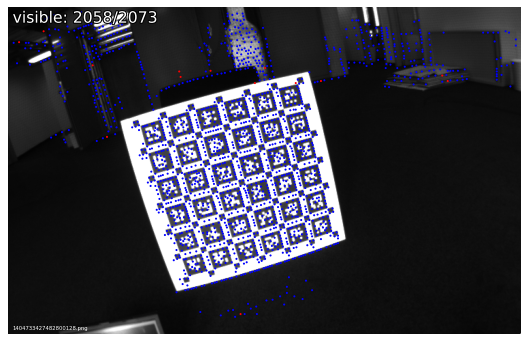

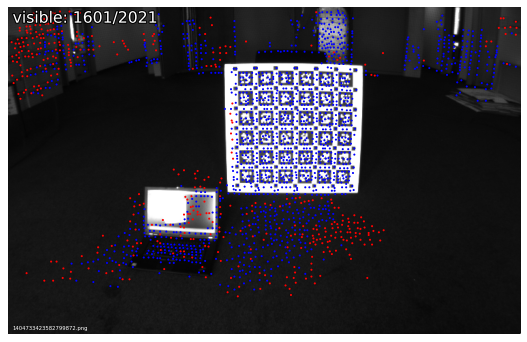

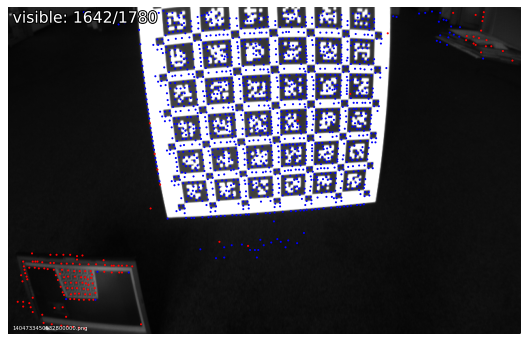

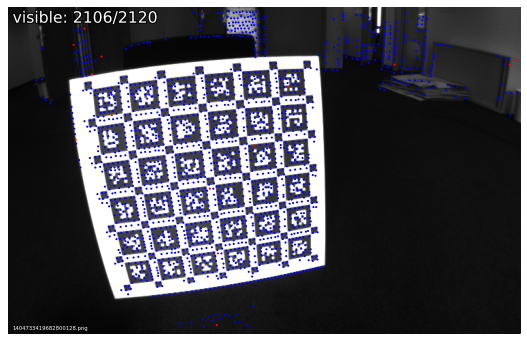

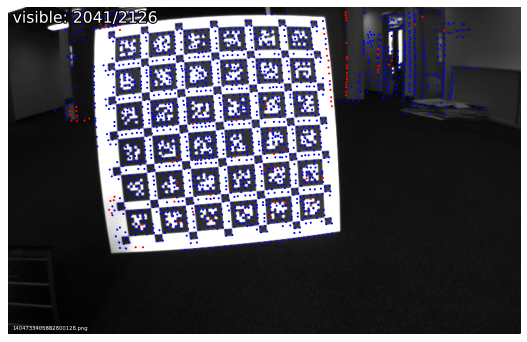

In [ ]:
visualization.visualize_sfm_2d(model, images, color_by='visibility', n=5)

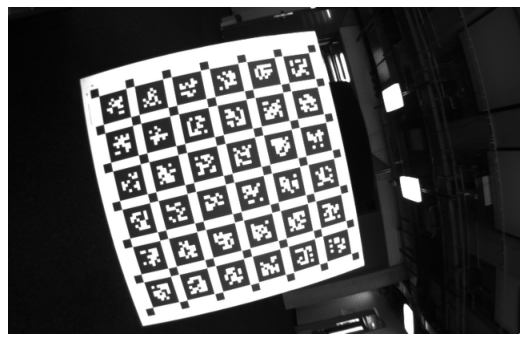

In [ ]:
#url = "https://upload.wikimedia.org/wikipedia/commons/5/53/Paris_-_Basilique_du_Sacr%C3%A9_Coeur%2C_Montmartre_-_panoramio.jpg"
# try other queries by uncommenting their url
#url = "https://upload.wikimedia.org/wikipedia/commons/5/59/Basilique_du_Sacr%C3%A9-C%C5%93ur_%285430392880%29.jpg"
# url = "https://upload.wikimedia.org/wikipedia/commons/8/8e/Sacr%C3%A9_C%C5%93ur_at_night%21_%285865355326%29.jpg"
url = "https://i.ibb.co/F68kFTF/1404733476682800128.png"
# query = 'query/night.jpg'
!mkdir -p $images/query && wget $url -O $images/$query -q
plot_images([read_image(images / query)], dpi=75)

In [ ]:
references_registered = [model.images[i].name for i in model.reg_image_ids()]
extract_features.main(feature_conf, images, image_list=[query], feature_path=features, overwrite=True)
pairs_from_exhaustive.main(loc_pairs, image_list=[query], ref_list=references_registered)
match_features.main(matcher_conf, loc_pairs, features=features, matches=matches, overwrite=True);

[2023/10/16 05:43:55 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 5000, 'name': 'disk'},
 'output': 'feats-disk',
 'preprocessing': {'grayscale': False, 'resize_max': 1600}}


  0%|          | 0/1 [00:00<?, ?it/s]

[2023/10/16 05:43:56 hloc INFO] Finished exporting features.
[2023/10/16 05:43:56 hloc INFO] Found 54 pairs.
[2023/10/16 05:43:56 hloc INFO] Matching local features with configuration:
{'model': {'features': 'disk', 'name': 'lightglue'},
 'output': 'matches-disk-lightglue'}
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



  0%|          | 0/54 [00:00<?, ?it/s]

[2023/10/16 05:43:59 hloc INFO] Finished exporting matches.


found 3570/4683 inlier correspondences.


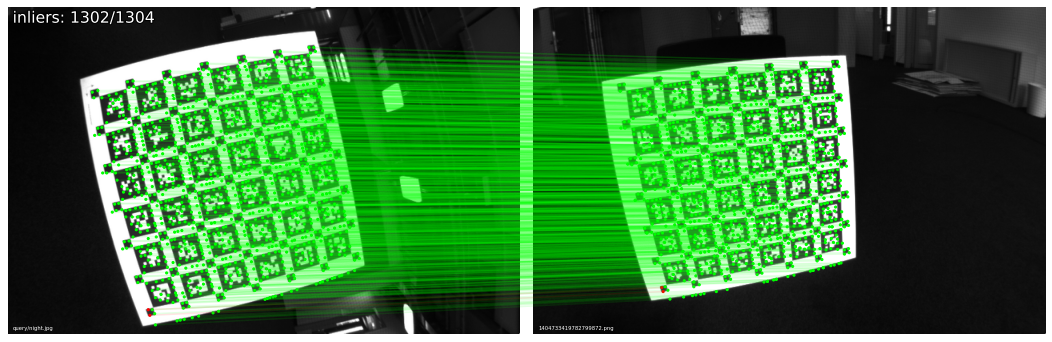

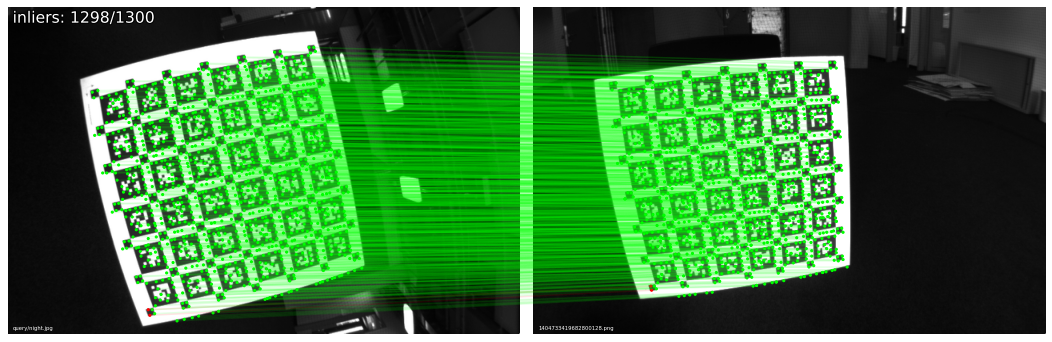

In [ ]:
import pycolmap
from hloc.localize_sfm import QueryLocalizer, pose_from_cluster

camera = pycolmap.infer_camera_from_image(images / query)
ref_ids = [model.find_image_with_name(r).image_id for r in references]
conf = {
    'estimation': {'ransac': {'max_error': 12}},
    'refinement': {'refine_focal_length': True, 'refine_extra_params': True},
}
localizer = QueryLocalizer(model, conf)
ret, log = pose_from_cluster(localizer, query, camera, ref_ids, features, matches)

print(f'found {ret["num_inliers"]}/{len(ret["inliers"])} inlier correspondences.')
visualization.visualize_loc_from_log(images, query, log, model)

In [ ]:
pose = pycolmap.Image(tvec=ret['tvec'], qvec=ret['qvec'])
viz_3d.plot_camera_colmap(fig, pose, camera, color='rgba(0,255,0,0.5)', name=query, fill=True)
# visualize 2D-3D correspodences
import numpy as np
inl_3d = np.array([model.points3D[pid].xyz for pid in np.array(log['points3D_ids'])[ret['inliers']]])
viz_3d.plot_points(fig, inl_3d, color="lime", ps=1, name=query)
fig.show()